# Airline passenger satisfacion 
---

<a id='index'></a>
## Index
- [Import relative libraries](#import_relative_libraries)
- [Importing data](#importing_data)
- [Cleaning data and data imputing](#cleaning_data_and_data_imputing)
- [Data visualization](#data_visualization)
- [Data prepossessing](#data_prepossessing)
- [Machine learing](#machine-learning)
    - [Model compile function](#model_compile_function)
    - [Testing Models](#testing_models)
        - [LogisticRegression](#logistic_regression)
        - [Decision Tree](#decision_tree)
        - [Random Forest](#random_forest)
        - [KNearest Neighbors](#kneighbors)
        - [Naive Bayes](#naive_bayes)
        - [Stochastic Gradient Desent](#SGD)
        - [Support Vector Machine](#support_vector_machine)
    - [Analyst models performance](#analyst_models_performance)


<a id='import_relative_libraries'></a>
### Import Relative Libraries

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn import svm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib as mpl
mpl.rc('image', cmap='gray')

%config InlineBackend.figure_format = 'retina'


<a id='importing_data'></a>
## Importing Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


#### Let's looking into the data here what we noticed: 
- Our *targat* is *'satisfaction'*
- Columns *'Unamed', 'id'* are neglectable since it on effect the *'satisfaction'*
- The data are not sort by any value, so no nedd to shuffle
- There are a lot of columns data type is *category*, encoding are require.

---

<a id='cleaning_data_and_data_imputing'></a>
## Cleaning Data and Data Imputing

Find missing values in dataset

In [5]:
print(pd.DataFrame({'Missing Value Train':train.isna().sum(),
                    'Missing Value Test':test.isna().sum() }))

                                   Missing Value Train  Missing Value Test
Unnamed: 0                                           0                   0
id                                                   0                   0
Gender                                               0                   0
Customer Type                                        0                   0
Age                                                  0                   0
Type of Travel                                       0                   0
Class                                                0                   0
Flight Distance                                      0                   0
Inflight wifi service                                0                   0
Departure/Arrival time convenient                    0                   0
Ease of Online booking                               0                   0
Gate location                                        0                   0
Food and drink           

Arrival Delay in Minutes* are have missing value, let's looking into data.

In [6]:
print(train.describe()['Arrival Delay in Minutes'],
      test.describe()['Arrival Delay in Minutes'])

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64 count    25893.000000
mean        14.740857
std         37.517539
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64


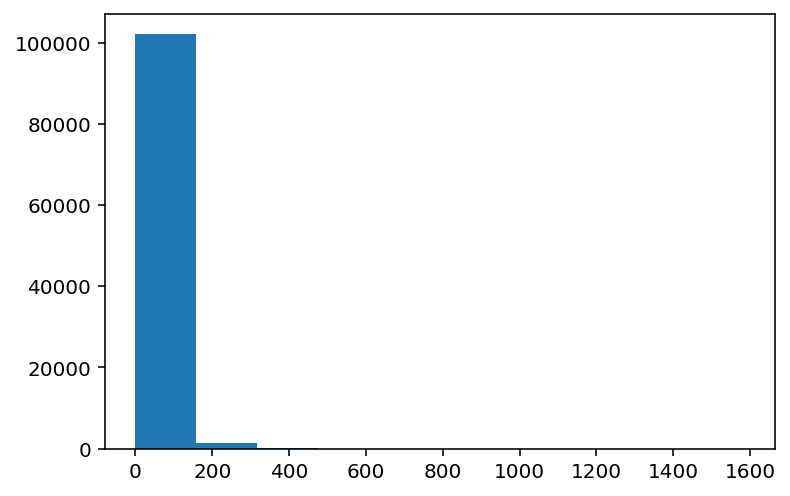

In [7]:
plt.hist(train['Arrival Delay in Minutes']);

The distribution is extremely Right-skew. Missing values are filled with **median** 

In [8]:
def clean_data(df):
    # Since Unnamed: 0 and id columns are not significant so we drop it
    df = df.drop(['Unnamed: 0', 'id'], axis=1)
    
    # The columns content 'white space' that might lead to error, so ' ' are replace with '_'
    df.columns = [x.replace(' ','_').lower() for x in df.columns]
    
   # Fill na values in column 'Arrival Delay in Minutes' with Median
    df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median())
    
    return df

train_cleaned = clean_data(train)
test_cleaned = clean_data(test)

---

<a id='data_visualization'></a>
## Data visualization

Separate *features* columns and *target* columns

In [86]:
features = ['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
target = ['satisfaction']

### Ratio of categorical features
Let's see how balance of dataset we have.

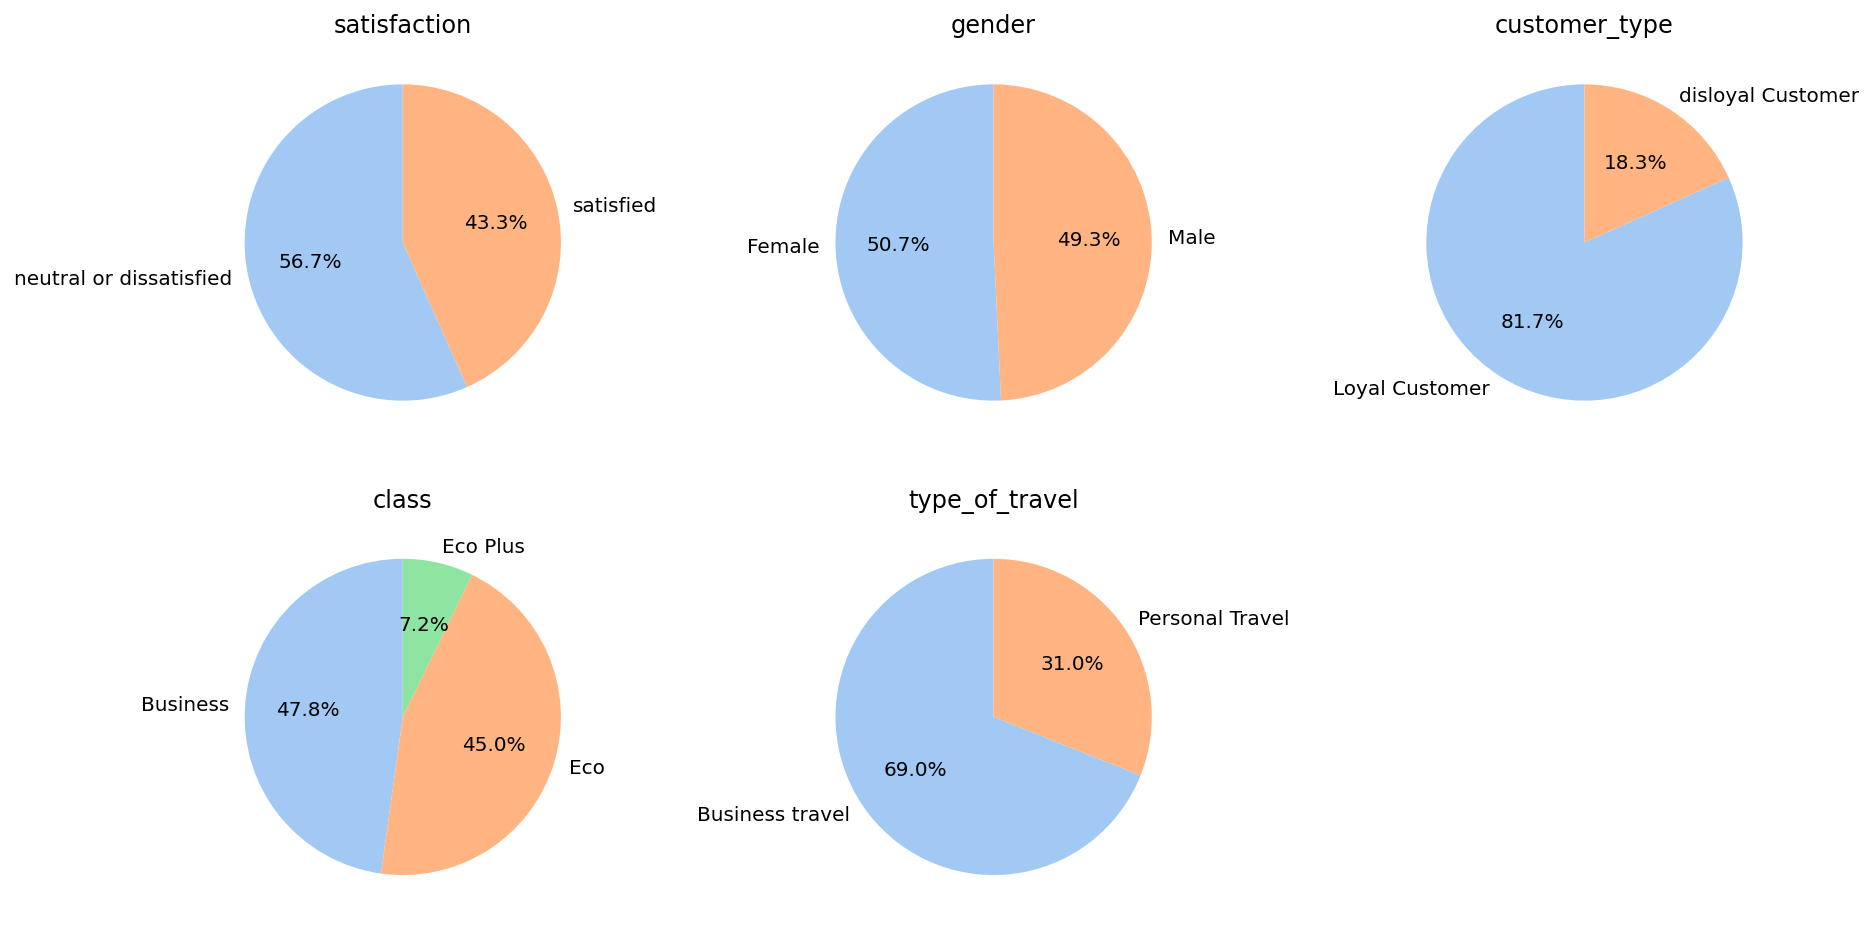

In [10]:
category = ['satisfaction', 'gender', 'customer_type', 'class', 'type_of_travel'] 
nrows = 2
ncols = 3
colors = sns.color_palette("pastel")

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))

for c, v in enumerate(category):
    df = train_cleaned.copy()
    data = df[category[c]].value_counts().sort_values(ascending=False)
    labels = df[category[c]].unique().tolist()
    labels.sort(reverse=False)
    axs[c//ncols, c%ncols].pie(x=data,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=90)
    axs[c//ncols, c%ncols].set_title(v)

fig.delaxes(axs[1,2])

plt.subplots_adjust(left=0.125,
                    right=.9, 
                    wspace=0.2)

#### The pie charts above telling us.
- The majority of customer are likely to neutral or dissatisfied
- Number of male and female sample are nearly same.
- Most of customer are regular customer
- Nearly half of customer chose business class.
- More than flight taken are for business purpose.

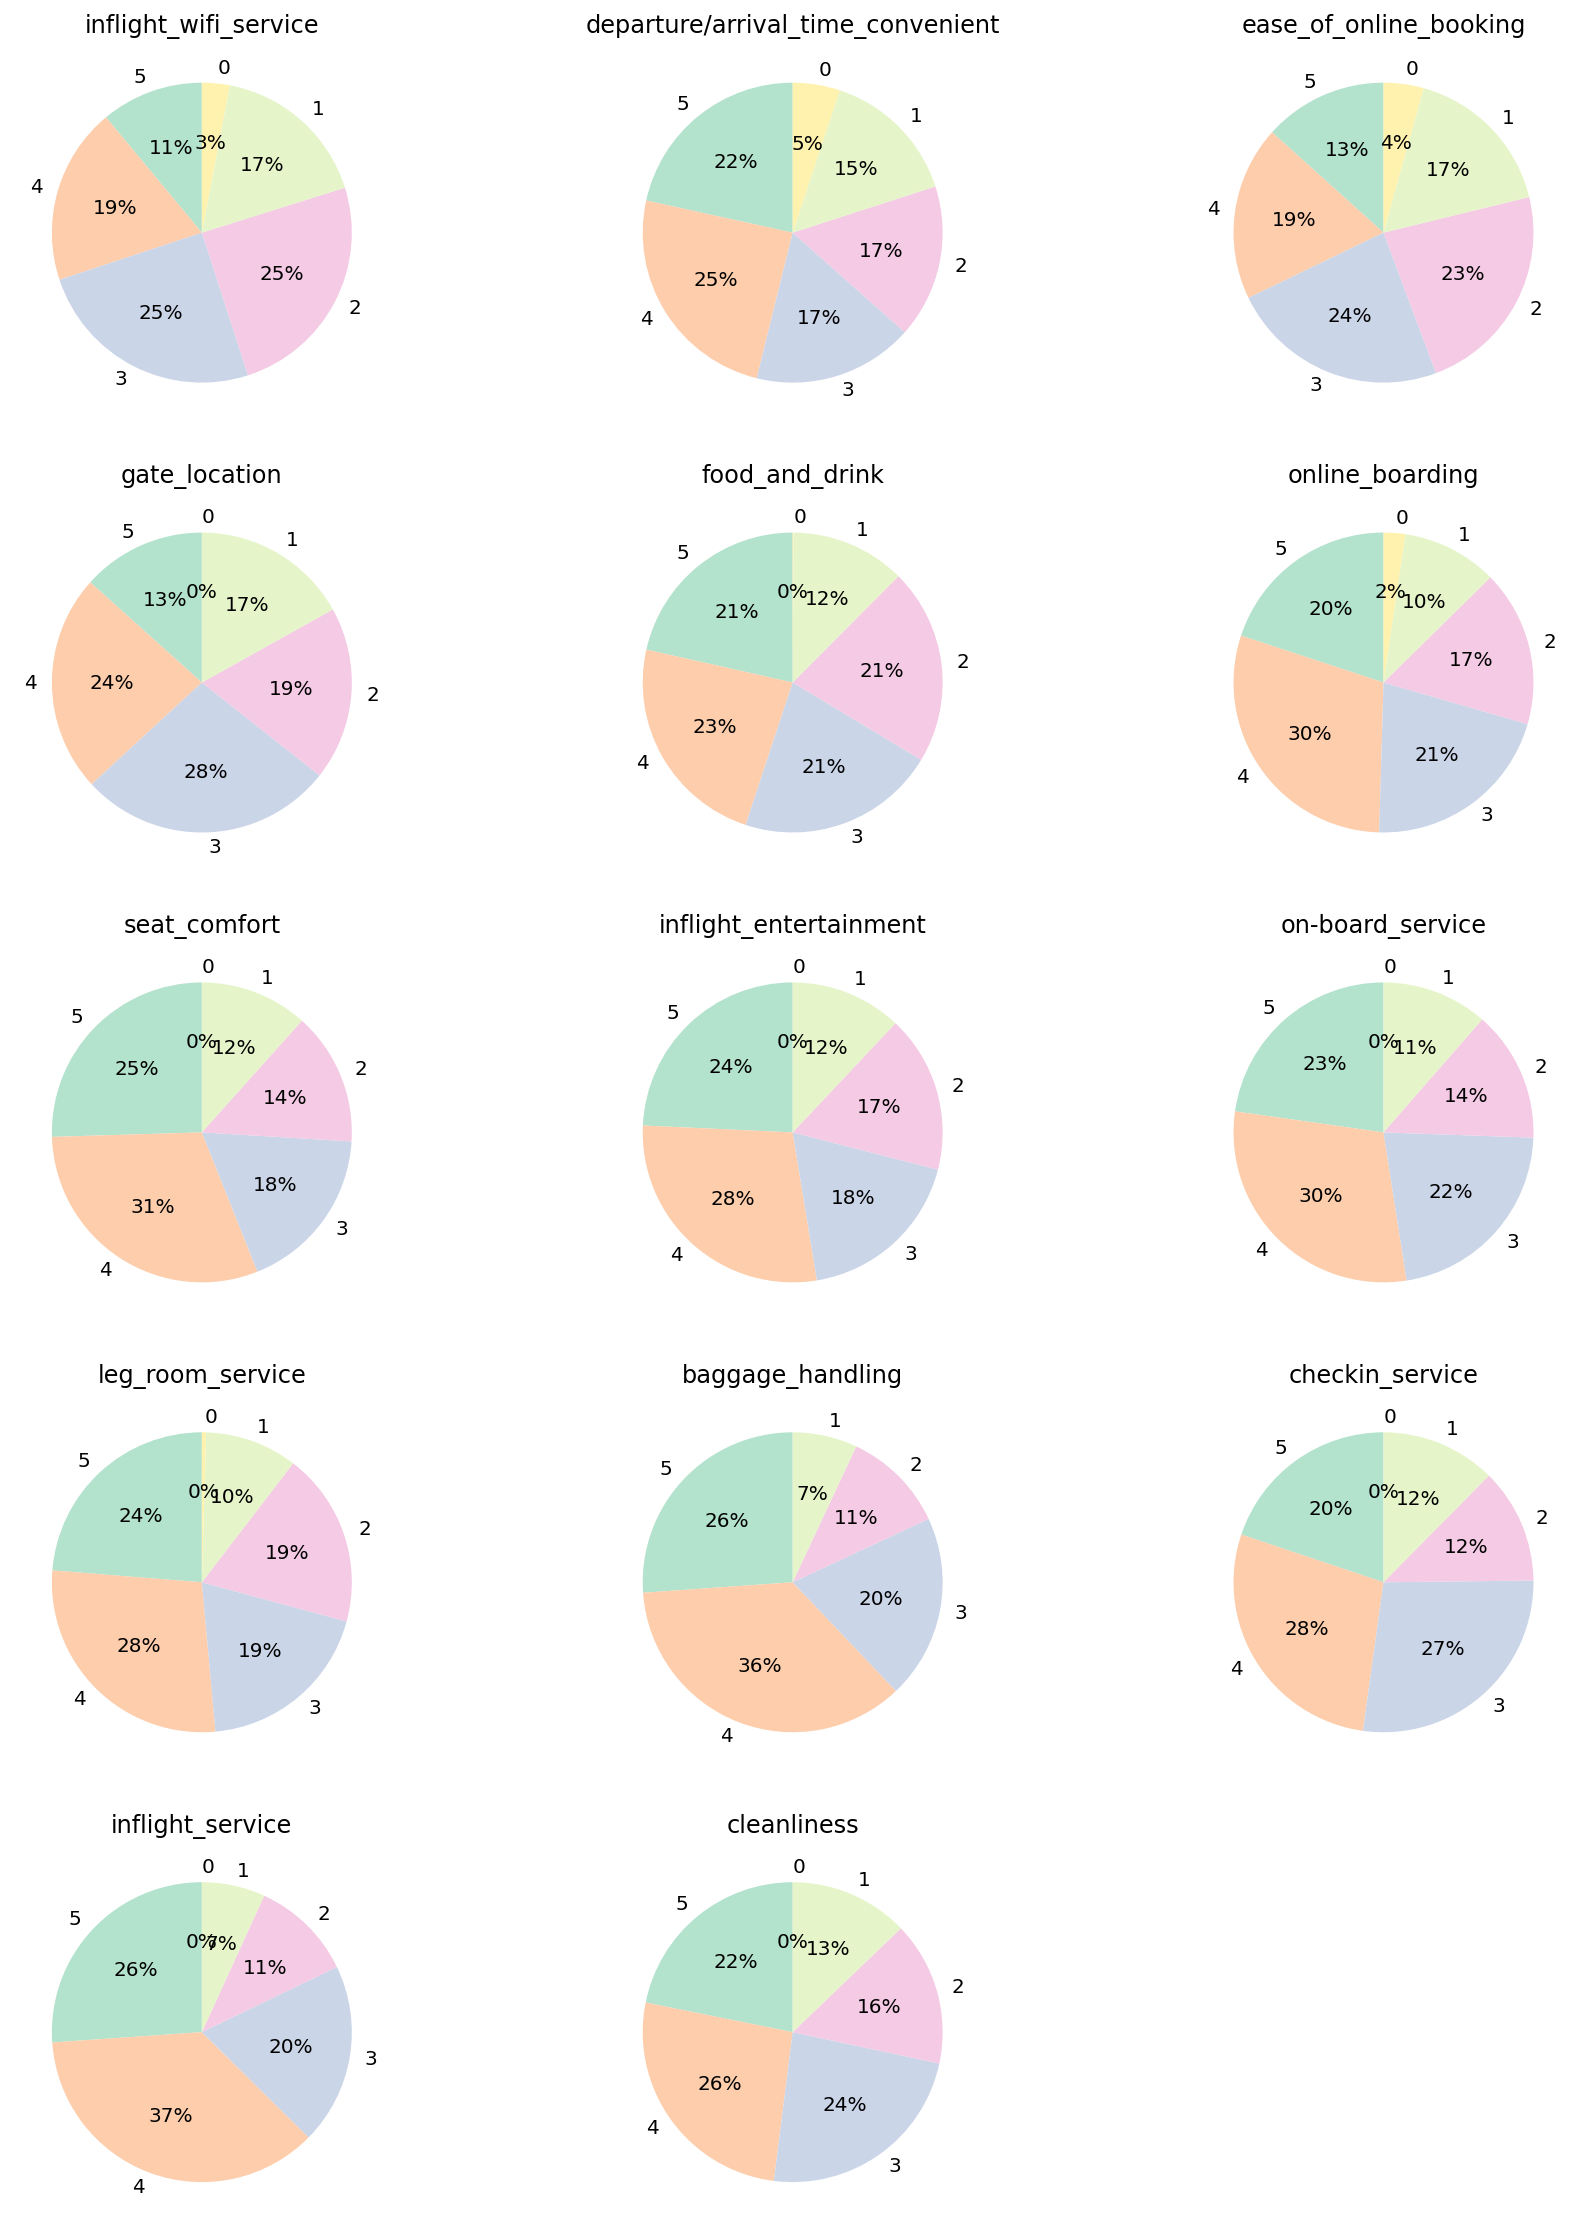

In [11]:
nrows = 5
ncols = 3
figsize = (15,20)
colors = sns.color_palette("Pastel2")


surveys = ['inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']

fig , axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
for c, v in enumerate(surveys):
    df=train_cleaned.copy()
    data = df[surveys[c]].value_counts().sort_index(ascending=False)
    labels = df[surveys[c]].unique().tolist()
    labels.sort(reverse=True)

    axs[c//ncols,c%ncols].pie(x=data, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
    axs[c//ncols,c%ncols].set_title(surveys[c])
    
fig.delaxes(axs[4,2])

**The survey scorce display us:**
- More than 60% of customer rated 4-5 with Bagage handlind and Inflight service.
- Less than 35% of customer rated 4-5 with Inflight wifi service and Ease of online booking.

### Satisfaction ratio of qualitative features

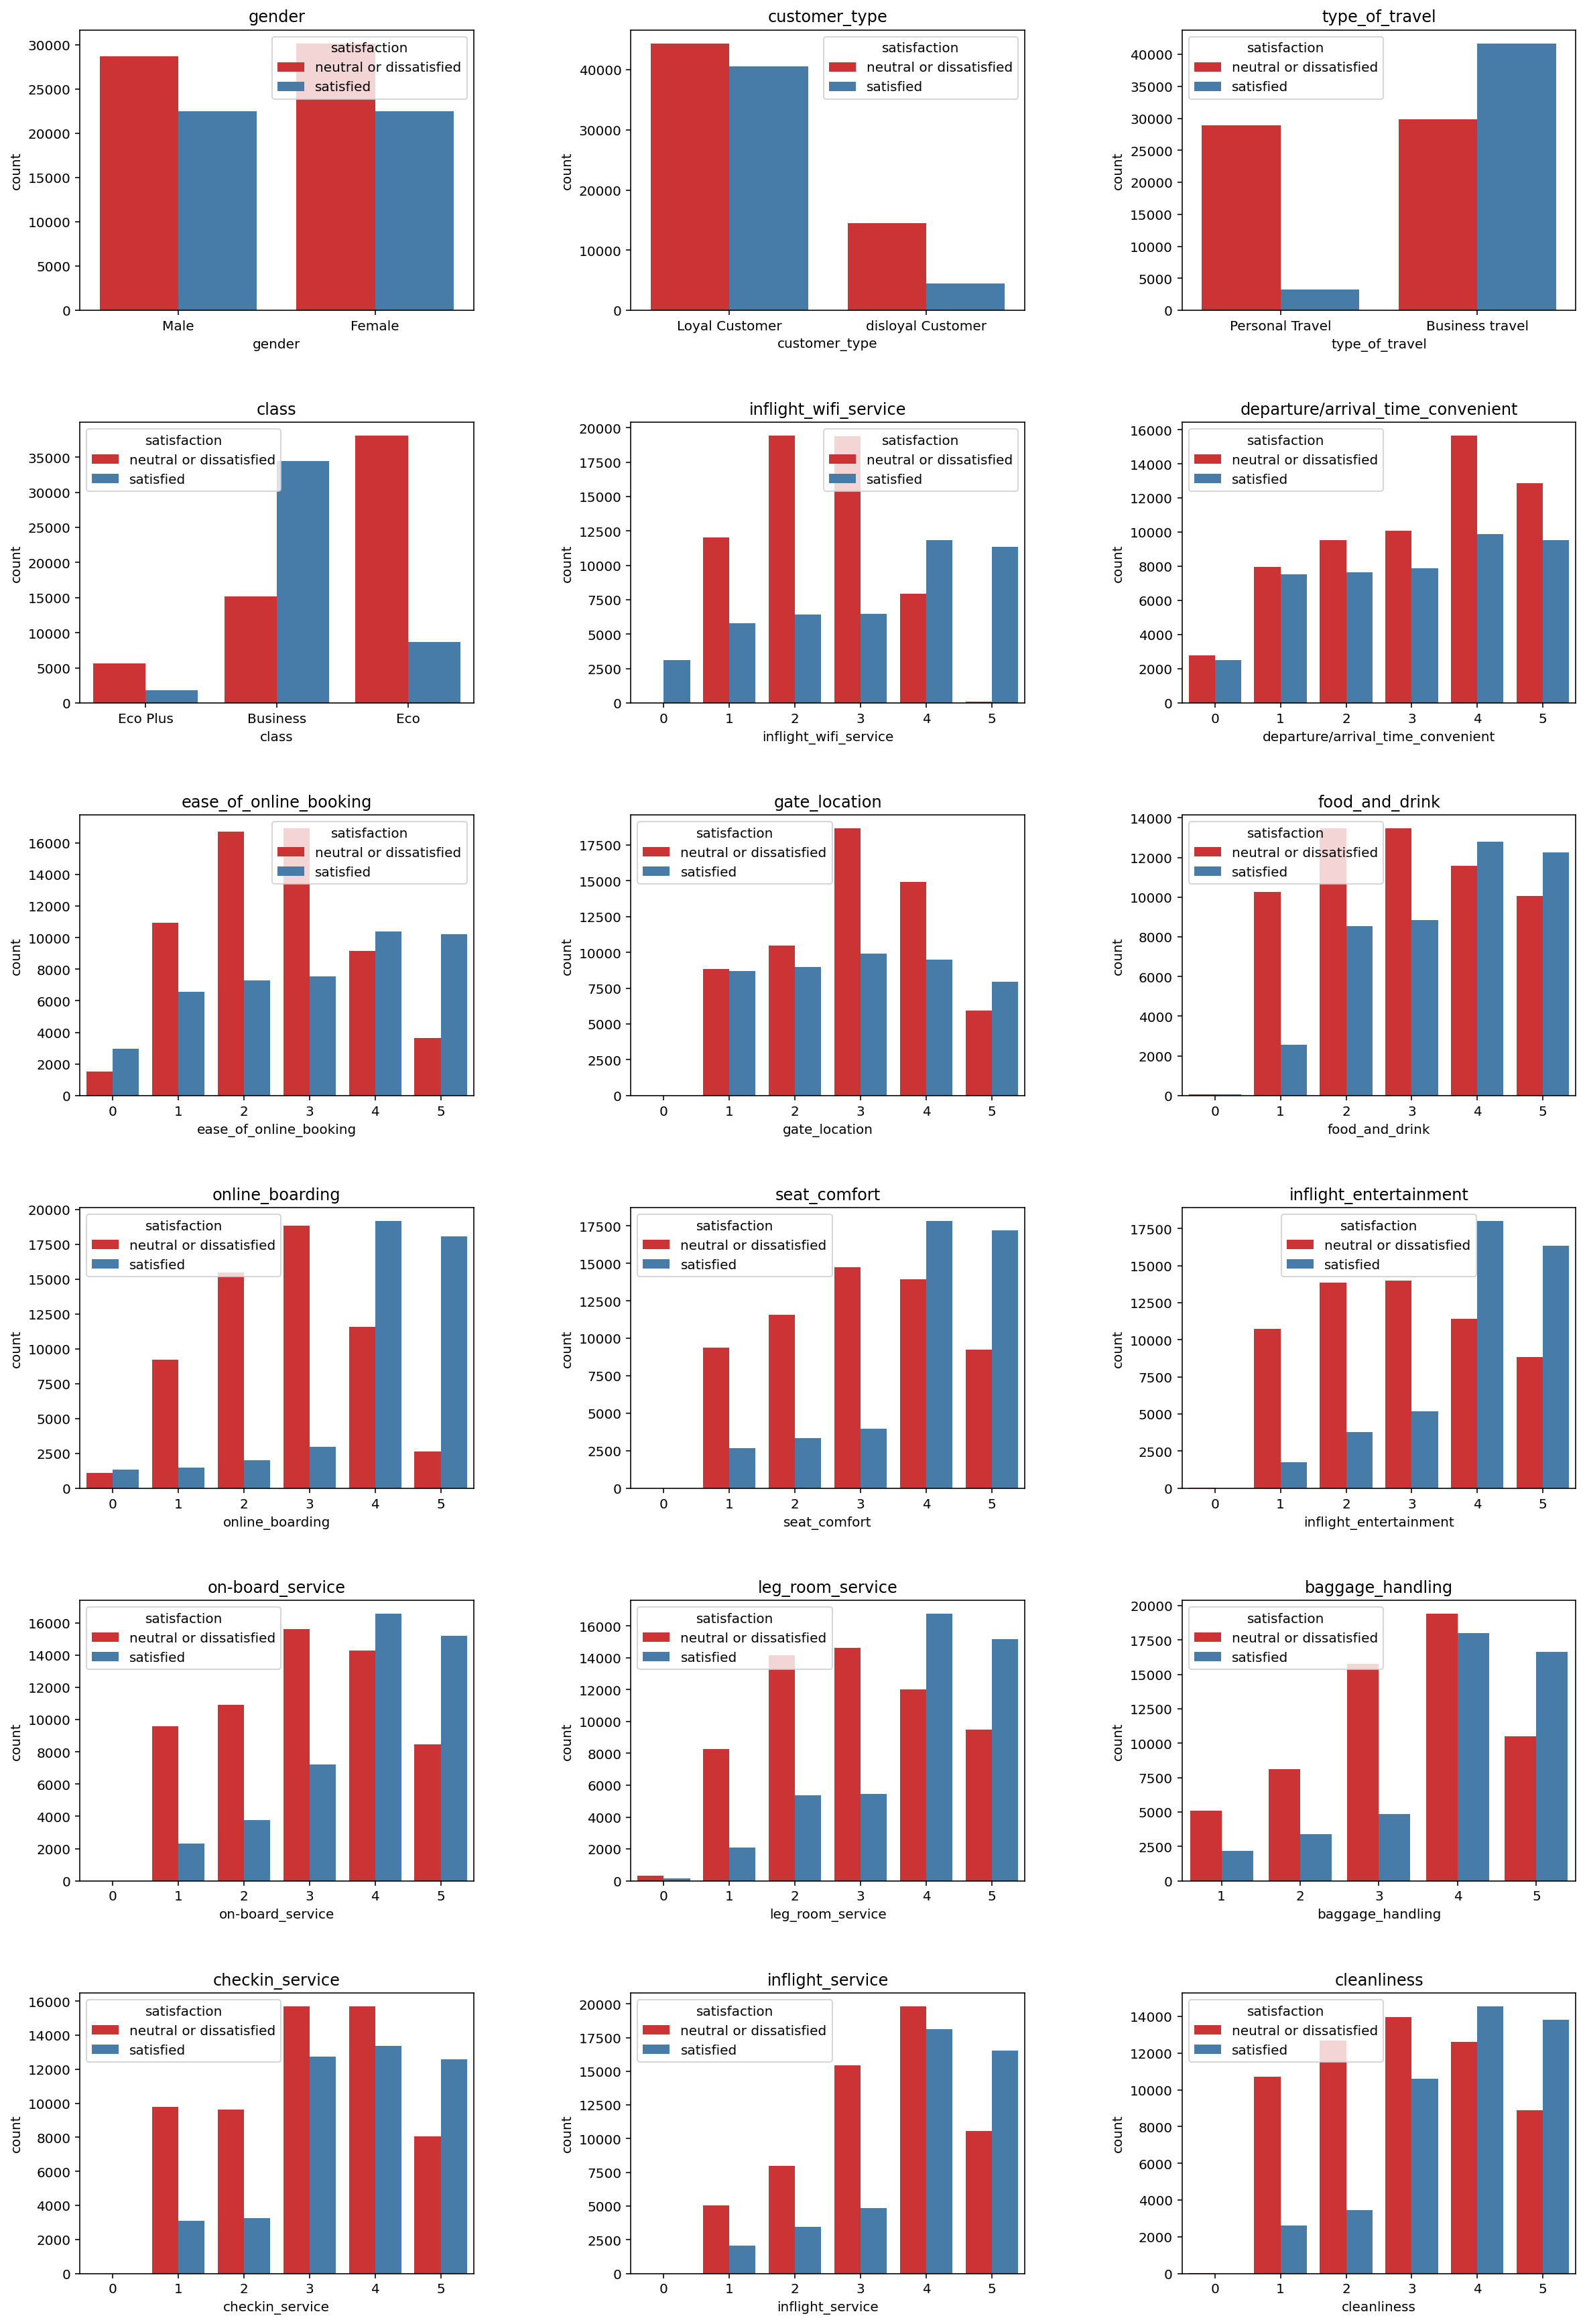

In [12]:
nrows = 6
ncols = 3
figsize = (20,30)
palette = sns.color_palette('Set1')


qualitative_feature = ['gender', 'customer_type', 'type_of_travel', 'class','inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']


fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

for c, v in enumerate(qualitative_feature):
    sns.countplot(x=qualitative_feature[c], hue='satisfaction', data=train_cleaned, palette=palette, ax=axs[c//ncols, c%ncols])
    axs[c//ncols, c%ncols].set_title(v)

# Adjust subplt layout
plt.subplots_adjust(left=0.125,
                    bottom=0.125, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

#### Some conclude about these plots reveal:
- The masses of *personal travel* customer receive bad experience.
- Majority of *eco* class feel dissatisfied.
- Mostly the survey show, if customer give 5 rating are likely to satisfied except *departure/arrival time convinent.*

---

#### Quantitative features

<AxesSubplot:>

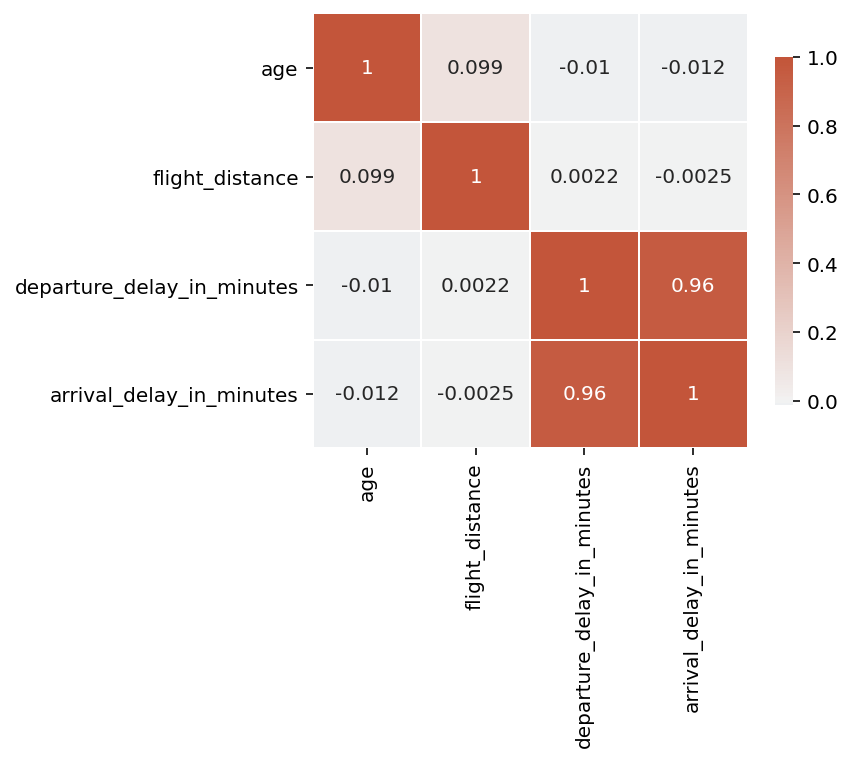

In [13]:
quan_features = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']

corr = train_cleaned[quan_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=None, cmap=cmap, vmax=1, center=0,
            annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

- A high correlation between *Departure Delay in Minutes and Arrival Delay in Minutes*,
is crystal clear due to late depart  also affect arrival time as well.

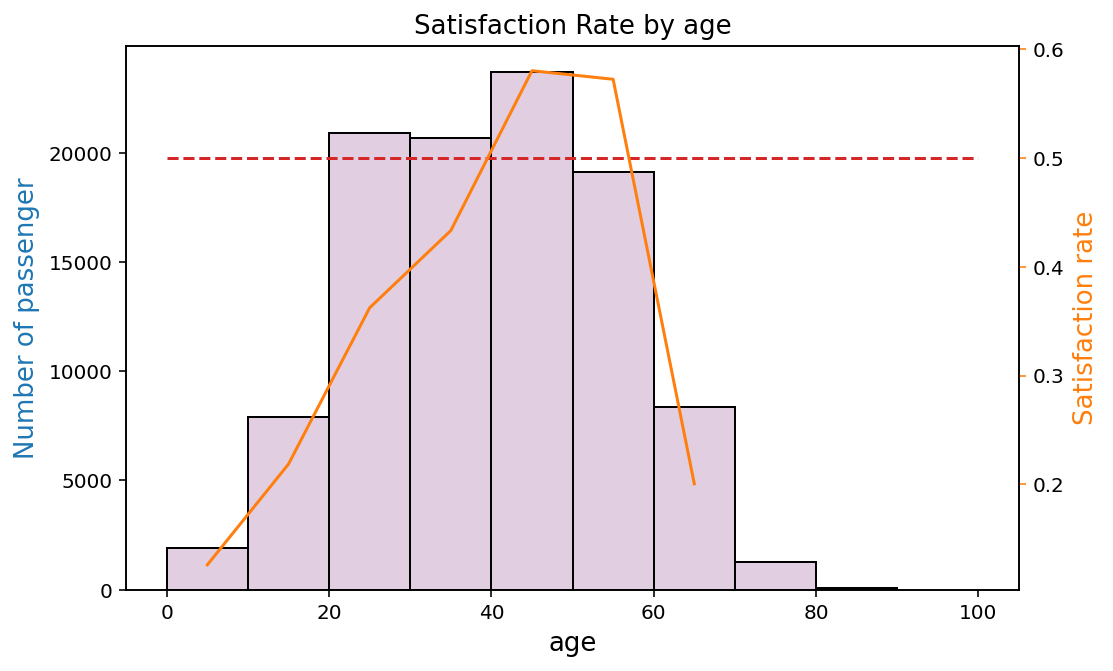

In [14]:
feature = 'age'
min_bin = 0
max_bin = 100
width = 10
bins = np.arange(min_bin, max_bin, width)


df = train_cleaned.copy()
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
df= df[(df[feature]>=df[feature].quantile(0.01)) &(df[feature]<=df[feature].quantile(.99))]
df[feature] = pd.cut(df[feature], bins=bins)
df1 = df.groupby(by=feature)['satisfaction'].sum()
df2 = df.groupby(by=feature)['satisfaction'].count()
y = (df1/df2).values
x = np.arange(min_bin+width/2, max_bin-width/2, width)


fig, ax1 = plt.subplots(figsize=(8,5))

ax1.set_title(f'Satisfaction Rate by {feature}', fontsize=13)

ax1.set_xlabel(feature, fontsize=13)
ax1.set_ylabel('Number of passenger', fontsize=13, color='tab:blue')
sns.histplot(train_cleaned[feature], bins=bins, color='thistle')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Satisfaction rate', fontsize=13, color=color)
ax2 = sns.lineplot(x=x, y=y, data = None, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

ax2.hlines(y=0.5, xmin=min_bin, xmax=max_bin, linestyles='dashed', color='tab:red')

- More than half a people age between 40-60 years pleased with their travel.

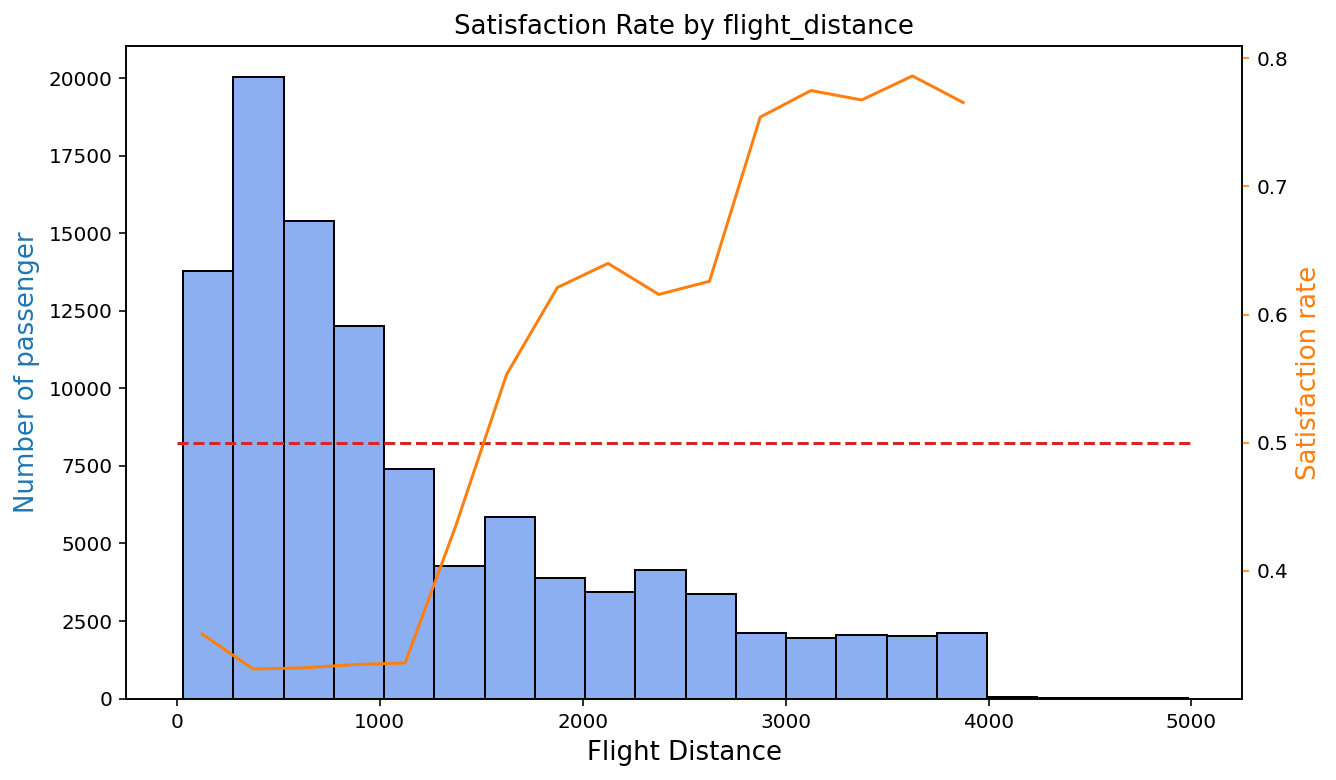

In [15]:
feature = 'flight_distance'
min_bin = 0
max_bin = 5000
width = 250
bins = np.arange(min_bin, max_bin, width)


df = train_cleaned.copy()
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
df= df[(df[feature]>=df[feature].quantile(0.01)) &
                  (df[feature]<=df[feature].quantile(0.99))]
df[feature] = pd.cut(df[feature], bins=bins)
df1 = df.groupby(by=feature)['satisfaction'].sum()
df2 = df.groupby(by=feature)['satisfaction'].count()
y = (df1/df2).values
x = np.arange(min_bin+width/2, max_bin-width/2, width)


fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title(f'Satisfaction Rate by {feature}', fontsize=13)

ax1.set_xlabel('Flight Distance', fontsize=13)
ax1.set_ylabel('Number of passenger', fontsize=13, color='tab:blue')
sns.histplot(train_cleaned['flight_distance'], bins=20, color='cornflowerblue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Satisfaction rate', fontsize=13, color=color)
ax2 = sns.lineplot(x=x, y=y, data = None, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

ax2.hlines(y=0.5, xmin=min_bin, xmax=max_bin, linestyles='dashed', color='tab:red')

- Considered plot show more distance of their flight give more happy they feel.

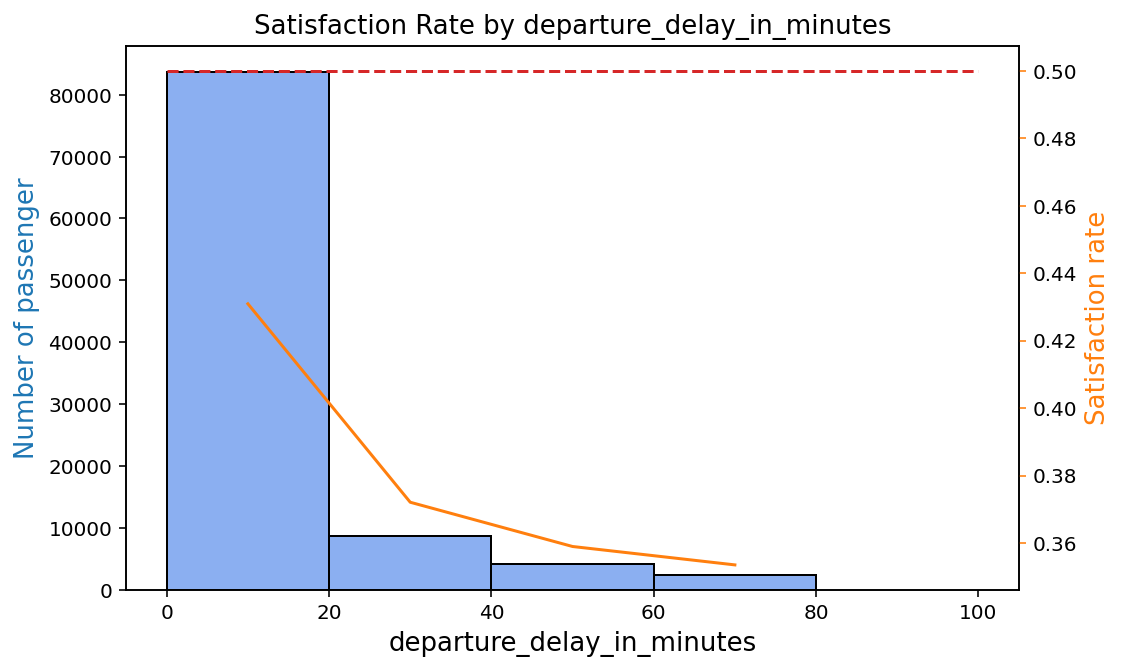

In [16]:
feature = 'departure_delay_in_minutes'
min_bin = 0
max_bin = 100
width = 20
bins = np.arange(min_bin, max_bin, width)


df = train_cleaned.copy()
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
df= df[(df[feature]>=df[feature].quantile(0.01)) &(df[feature]<=df[feature].quantile(0.99))]
df[feature] = pd.cut(df[feature], bins=bins)
df1 = df.groupby(by=feature)['satisfaction'].sum()
df2 = df.groupby(by=feature)['satisfaction'].count()
y = (df1/df2).values
x = np.arange(min_bin+width/2, max_bin-width/2, width)


fig, ax1 = plt.subplots(figsize=(8,5))

ax1.set_title(f'Satisfaction Rate by {feature}', fontsize=13)

ax1.set_xlabel(feature, fontsize=13)
ax1.set_ylabel('Number of passenger', fontsize=13, color='tab:blue')
sns.histplot(train_cleaned[feature], bins=bins, color='cornflowerblue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Satisfaction rate', fontsize=13, color=color)
ax2 = sns.lineplot(x=x, y=y, data = None, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.hlines(y=0.5, xmin=min_bin, xmax=max_bin, linestyles='dashed', color='tab:red')

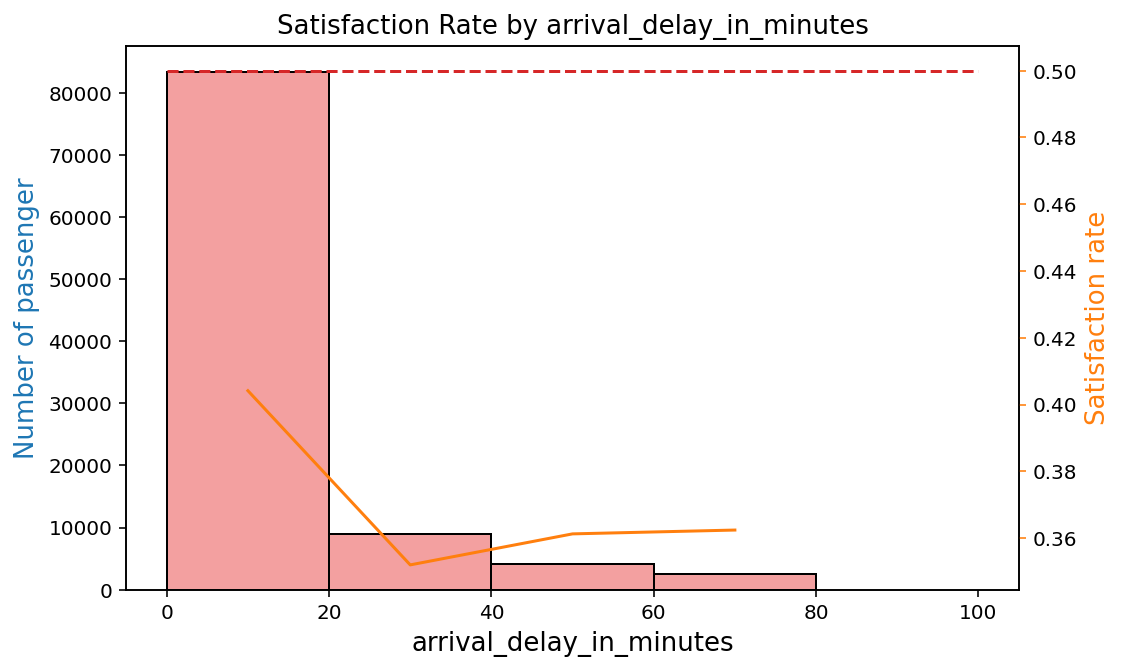

In [17]:
feature = 'arrival_delay_in_minutes'
min_bin = 0
max_bin = 100
width = 20
bins = np.arange(min_bin, max_bin, width)


df = train_cleaned.copy()
df['satisfaction']=df['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
df= df[(df[feature]>=df[feature].quantile(0.01)) &(df[feature]<=df[feature].quantile(0.99))]
df[feature] = pd.cut(df[feature], bins=bins)
df1 = df.groupby(by=feature)['satisfaction'].sum()
df2 = df.groupby(by=feature)['satisfaction'].count()
y = (df1/df2).values
x = np.arange(min_bin+width/2, max_bin-width/2, width)


fig, ax1 = plt.subplots(figsize=(8,5))

ax1.set_title(f'Satisfaction Rate by {feature}', fontsize=13)

ax1.set_xlabel(feature, fontsize=13)
ax1.set_ylabel('Number of passenger', fontsize=13, color='tab:blue')
sns.histplot(train_cleaned[feature], bins=bins, color='lightcoral')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Satisfaction rate', fontsize=13, color=color)
ax2 = sns.lineplot(x=x, y=y, data = None, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
ax2.hlines(y=0.5, xmin=min_bin, xmax=max_bin, linestyles='dashed', color='tab:red')

- Depart time delay and arrival time delay show us. It obiviously joyless for customer if their flying is delayed

---

<a id='data_prepossessing'></a>
## Data Prepossessing

#### Data Transform

In [18]:
train_prepossessed = train_cleaned.copy()
# looking into data
train_prepossessed.describe(include='all')

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


Sevaral columns are categories e.g. Gender has 2 values (Male, Female), those variables are need to encode for better perform on the classification model.

In [19]:
# We assume neutral = dissatisfied
# convert values in stat
def process_data(df):
    df['gender'] = df['gender'].replace({'Female':0, 'Male':1})
    df['customer_type'] = df['customer_type'].replace({'disloyal Customer':0, 'Loyal Customer':1})
    df['type_of_travel'] = df['type_of_travel'].replace({'Personal Travel':0, 'Business travel':1})
    df['class'] = df['class'].replace({'Eco':0, 'Eco Plus':1, 'Business':2})
    df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
    return df

train_processed = process_data(train_cleaned)
test_processed = process_data(test_cleaned)

#### Define features and target

In [20]:
features = ['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
target = ['satisfaction']

X_train = train_processed[features]
#y_train = train_processed[target].to_numpy()
y_train = train_processed[target].values.ravel()
X_test = test_processed[features]
#y_test = test_processed[target].to_numpy()
y_test = test_processed[target].values.ravel()

#### Standardize

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
#X_test_scaled = scaler.fit_transform(X_test)

---
<a id='machine-learning'></a>
## Machine learning

<a id='model_compile_function'></a>
#### Build function to execute classification models that  yield:
- Confusion matrix
- ROC curve
- return variables
    1. Model
    2. ROC_ AOC score
    3. Time it take for run model

In [22]:
def run_model(model, X_train, X_test, y_train, y_test):
    
    t0 = time.time()
    
    model.fit(X_train, y_train)

    plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, cmap='viridis', normalize='all')
    plt.title('Confusion matrix y_test/ y_predict_test')
    plot_roc_curve(estimator=model, X=X_test, y=y_test)
    plt.show()
    
    y_test_pred = model.predict(X_test)
    model_test_score = model.score(X_test, y_test)

    roc_auc_test_score = roc_auc_score(y_test, y_test_pred)
    
    print(f"{str(model)[0:-2]}")
    print(f"Accuracy: {model_test_score}")
    print(f"ROC_AUC: {roc_auc_test_score}")
    
    time_takken = time.time()-t0
    print(f"Time takken: {time_takken}")
    
    
    return model, roc_auc_test_score, time_takken

<a id='testing_models'></a>
## Testing Models

<a id='logistic_regression'></a>
#### LogisticRegression

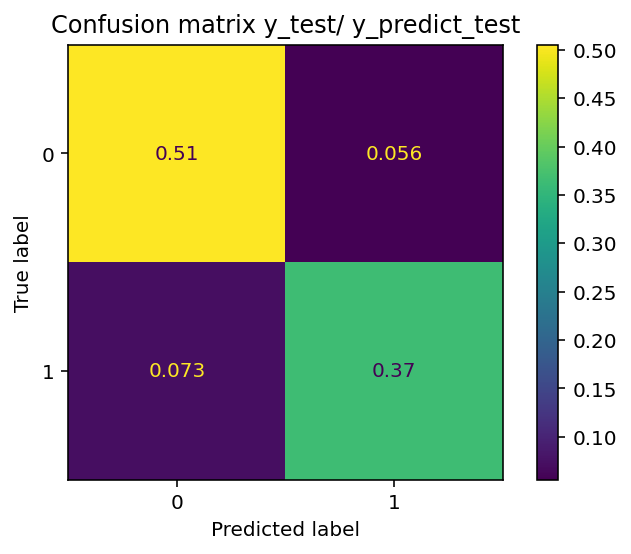

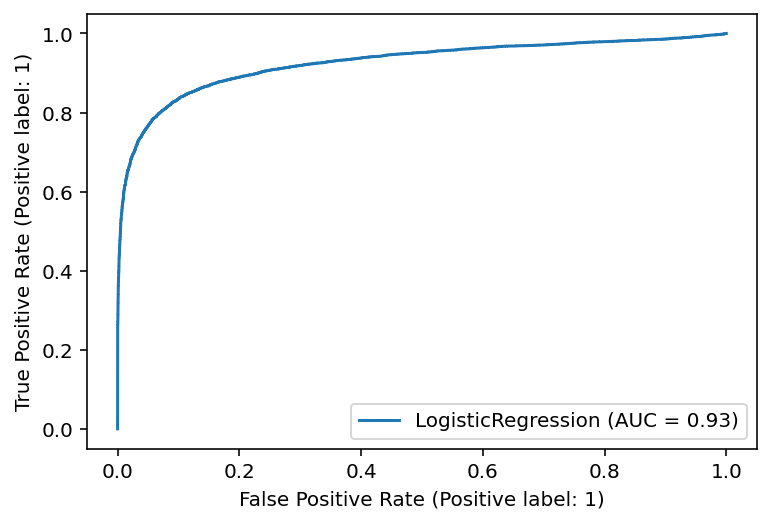

LogisticRegression
Accuracy: 0.8713427779488759
ROC_AUC: 0.8672326102797121
Time takken: 0.713632345199585


In [23]:
model = LogisticRegression()
model_log, roc_auc_log, time_log = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='decision_tree'></a>
#### Decision Tree

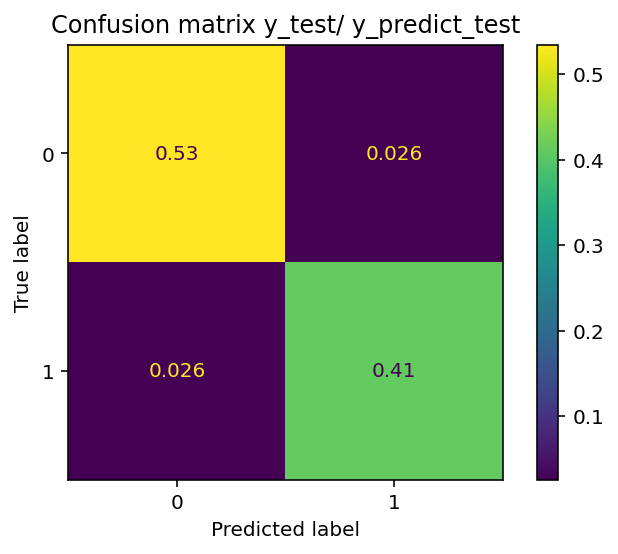

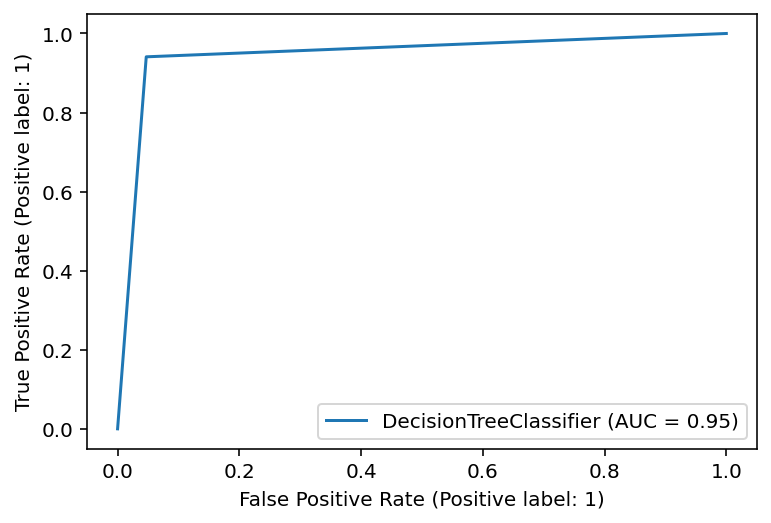

DecisionTreeClassifier
Accuracy: 0.947682476131814
ROC_AUC: 0.9469535444542961
Time takken: 1.2126500606536865


In [24]:
model = DecisionTreeClassifier()
model_dt, roc_auc_dt, time_dt = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='random_forest'></a>
#### Random forest

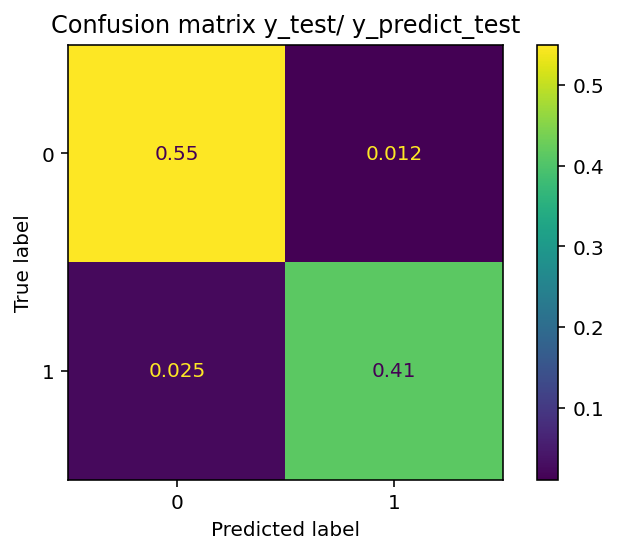

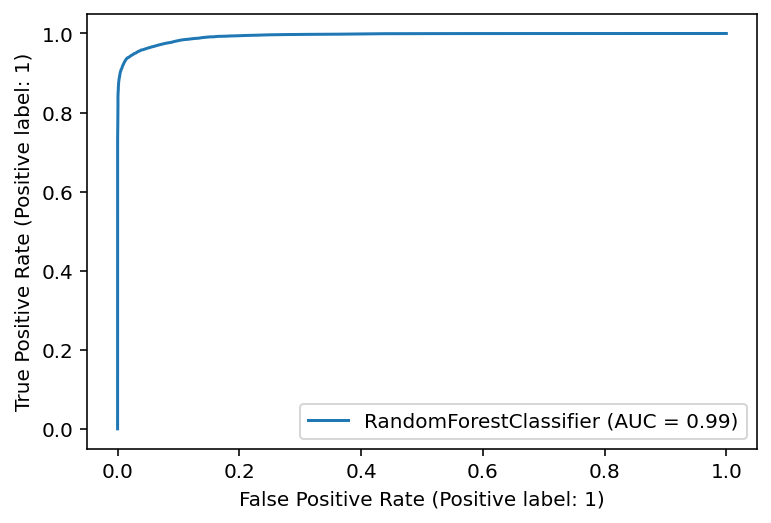

RandomForestClassifier
Accuracy: 0.96311980289498
ROC_AUC: 0.9608453978220515
Time takken: 14.945982456207275


In [25]:
model = RandomForestClassifier()
model_rf, roc_auc_rf, time_rf= run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='kneighbors'></a>
#### KNeighbors

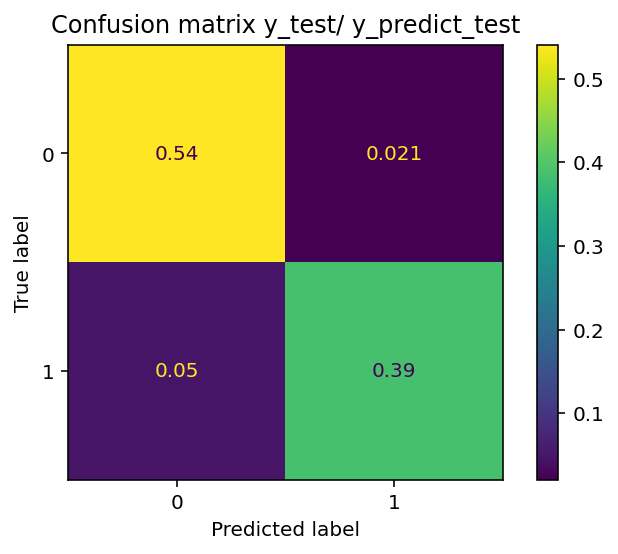

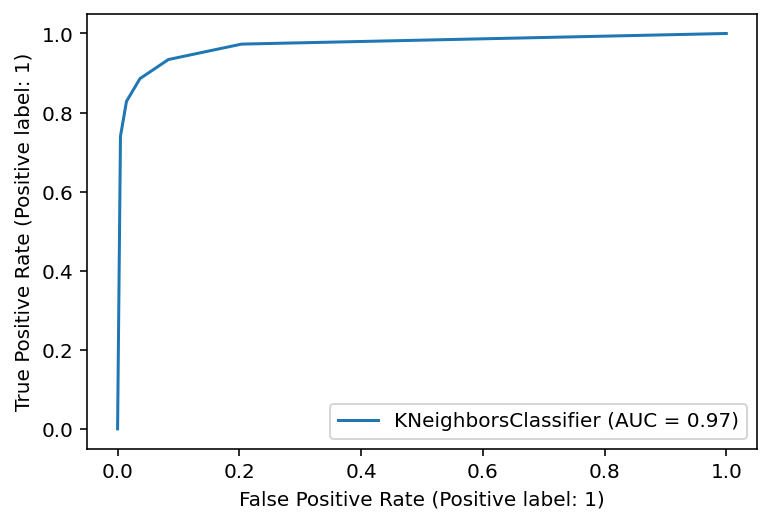

KNeighborsClassifier
Accuracy: 0.9292808746535264
ROC_AUC: 0.9245634350907366
Time takken: 203.3506727218628


In [26]:
params_kn = {}

model = KNeighborsClassifier(**params_kn)
model_kn, roc_auc_kn, time_kn= run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='naive_bayes'></a>
#### Naive Bayes

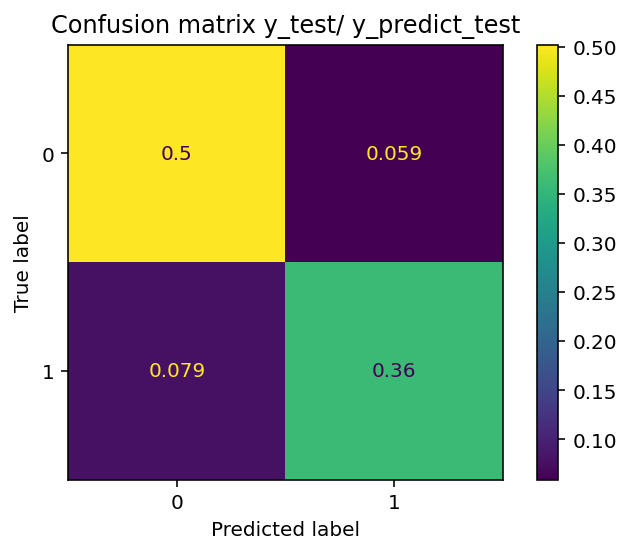

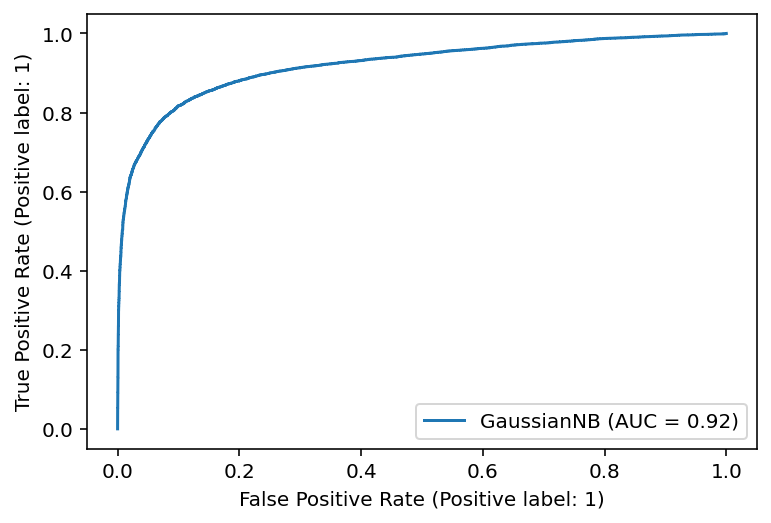

GaussianNB
Accuracy: 0.8619494918386202
ROC_AUC: 0.8574207132863818
Time takken: 0.7311832904815674


In [27]:
model = GaussianNB()
model_nb, roc_auc_nb, time_nb = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='SGD'></a>
#### Stochastic Gradient Descent

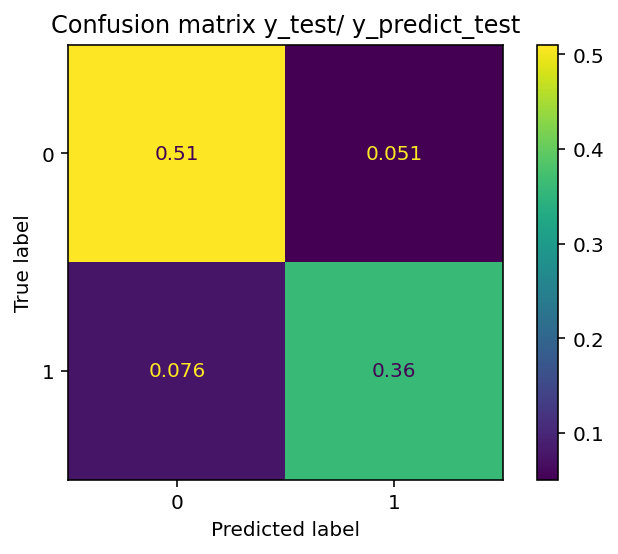

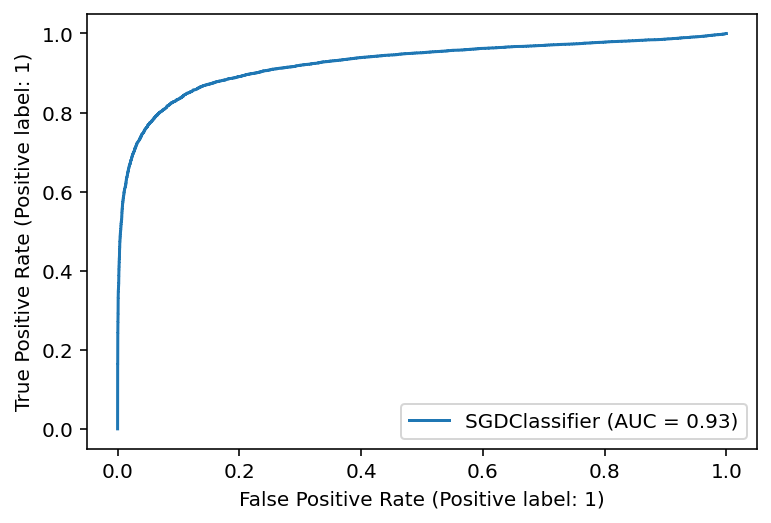

SGDClassifier
Accuracy: 0.8726901755466585
ROC_AUC: 0.8675941097097228
Time takken: 1.0003020763397217


In [28]:
model = SGDClassifier()
model_sgd, roc_auc_sgd, time_sgd = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='support_vector_machine'></a>
#### Support Vector Machine

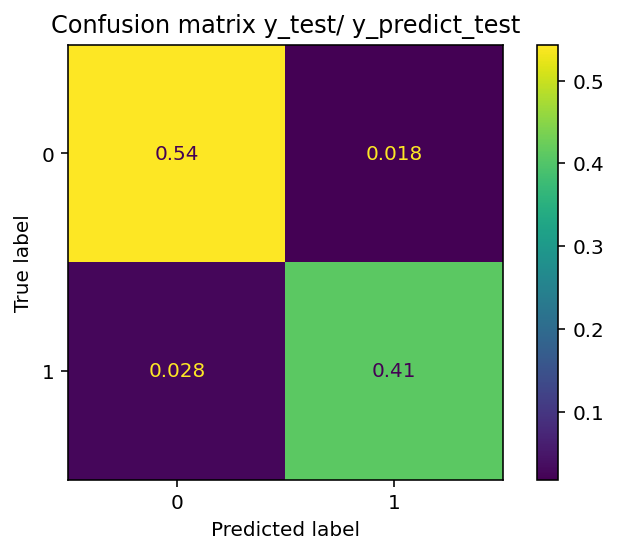

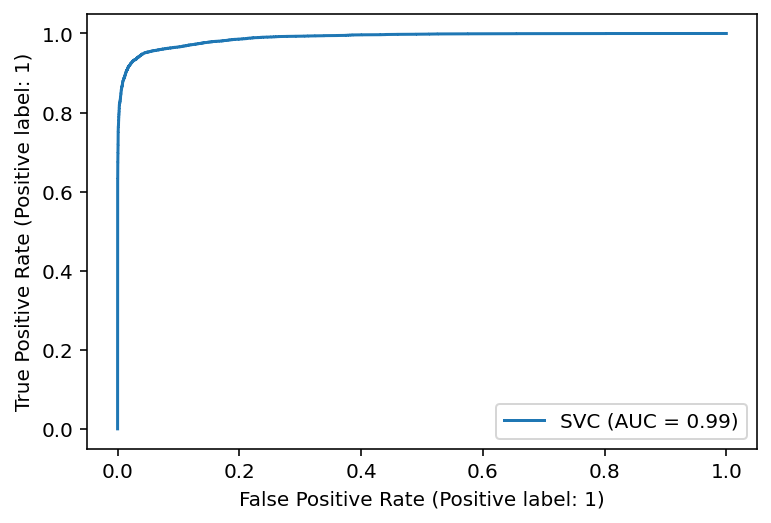

SVC
Accuracy: 0.954650446566061
ROC_AUC: 0.9527344452357143
Time takken: 452.1418466567993


In [29]:
model = svm.SVC()
model_svm, roc_auc_svm, time_svm = run_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<a id='analyst_models_performance'></a>
## Analyst models performance

In [32]:
model_names = [model_log, model_dt, model_rf, model_kn, model_nb, model_sgd, model_svm]
model_names = [(str(x)[:-2]) for x in model_names]

roc_auc_scores = [roc_auc_log, roc_auc_dt, roc_auc_rf, roc_auc_kn, roc_auc_nb, roc_auc_sgd, roc_auc_svm]
time_takkens = [time_log, time_dt, time_rf, time_kn, time_nb, time_sgd, time_svm]

model_scores = pd.DataFrame({'Model':model_names, 'ROC': roc_auc_scores, 'Time': time_takkens})
model_scores.sort_values('ROC')

,Model,ROC,Time
4,GaussianNB,0.857421,0.731183
0,LogisticRegression,0.867233,0.713632
5,SGDClassifier,0.867594,1.000302
3,KNeighborsClassifier,0.924563,203.350673
1,DecisionTreeClassifier,0.946954,1.212650
6,SVC,0.952734,452.141847
2,RandomForestClassifier,0.960845,14.945982


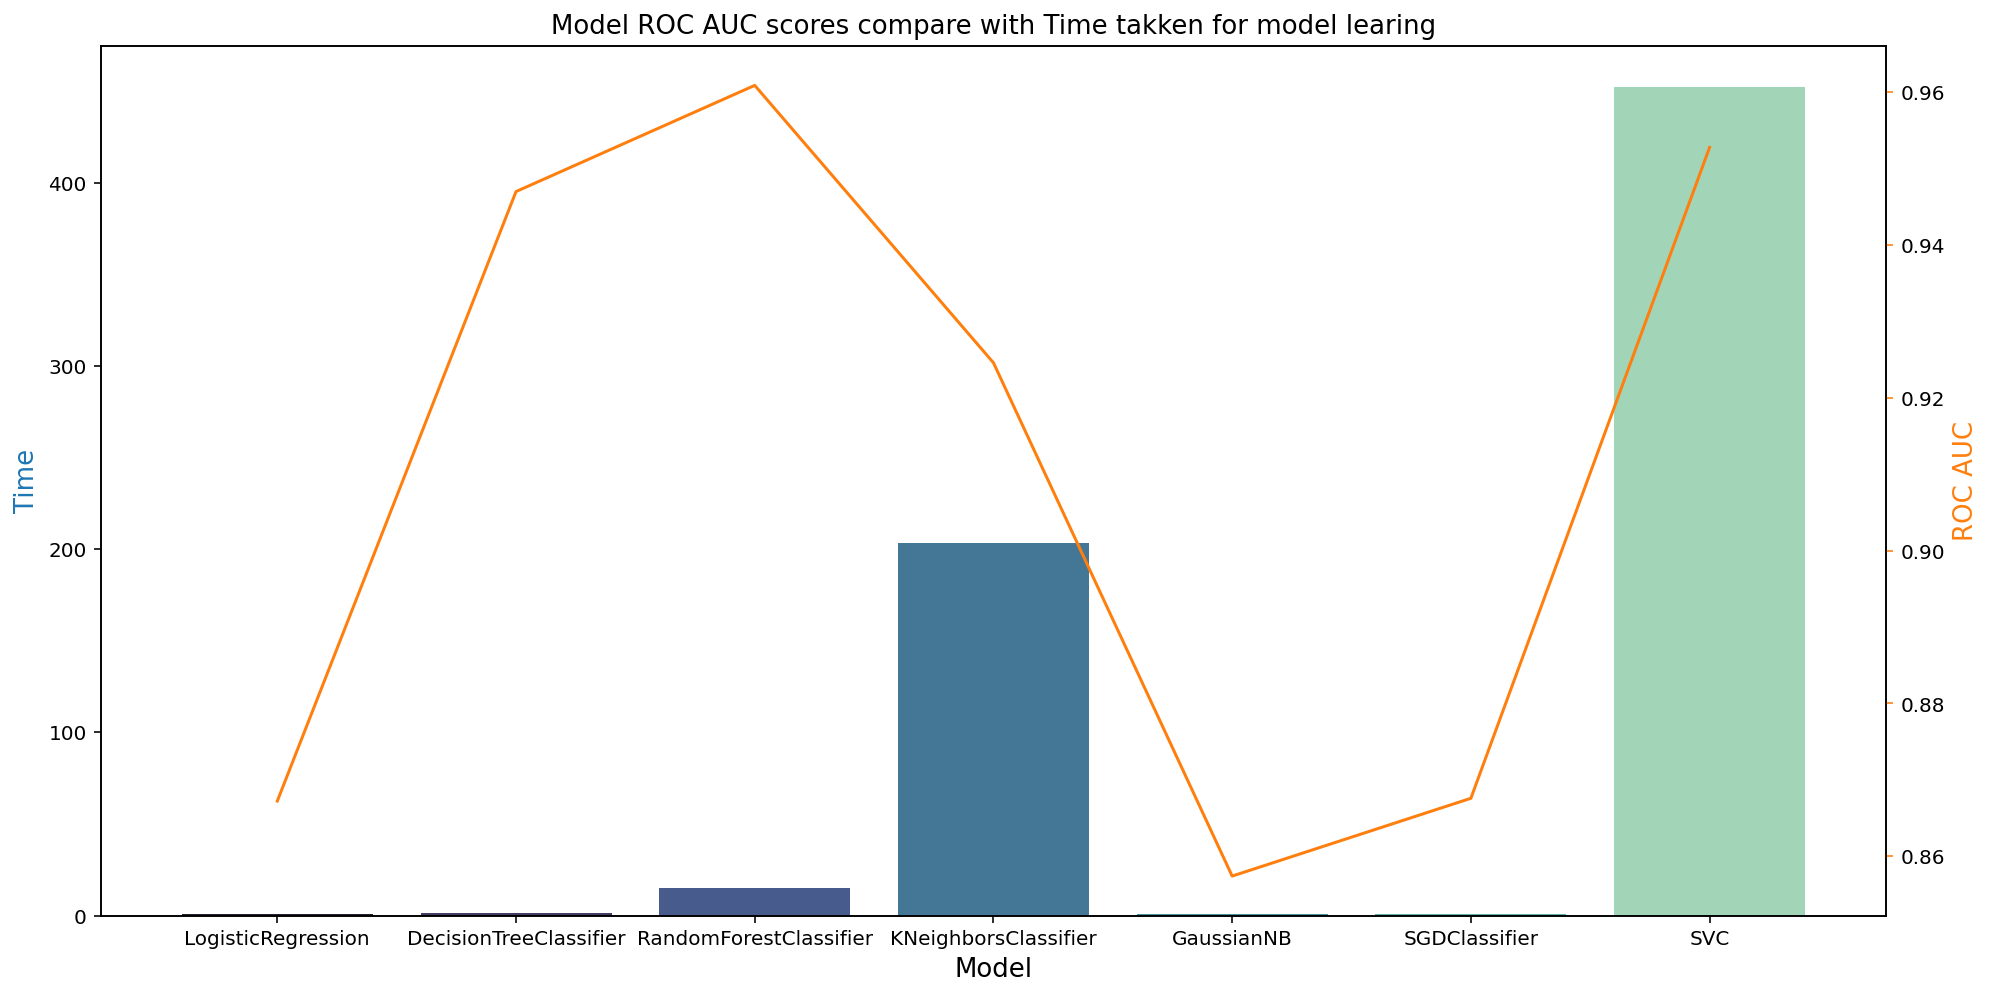

In [85]:
fig, ax1 = plt.subplots(figsize=(16,8))

ax1.set_title('Model ROC AUC scores compare with Time takken for model learing', fontsize=13)

ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time', fontsize=13, color='tab:blue')
sns.barplot(x='Model', y='Time', data=model_scores, palette='mako')
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC', data = model_scores, color=color)
ax2.tick_params(axis='y', color=color)


#### Conclusion of considering plot:
- In term of *ROC_AUC scores* **random forest, dicision tree** and **support vector machine** quite high but in term of *time* **SVM** need huge amout.
- Return highest *ROC_AUC* and fast to compile **Random forest** are the best model for this classification given data.

## [Return to Index](#index)